In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import IPython.display as ipd
from IPython.display import Image
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le1= preprocessing.LabelEncoder()
from sklearn.svm import SVR
#from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
#from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [35]:
df=pd.read_csv('/Users/abhaylal/Desktop/SAC/Assignments/Week_6_hackathon/Train_Data.csv')
new_test_data=pd.read_csv('/Users/abhaylal/Desktop/SAC/Assignments/Week_6_hackathon/Test_Data.csv')
df.head(10)

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71
5,01-08-2020,campaign 1,adgroup 2,ad 2,7,2,0.04,0,0.00
6,01-08-2020,campaign 1,adgroup 4,ad 2,6,3,0.05,0,0.00
7,01-08-2020,campaign 1,adgroup 1,ad 3,129,52,0.58,0,0.00
8,01-08-2020,campaign 1,adgroup 3,ad 3,104,56,0.56,0,0.00
9,01-08-2020,campaign 1,adgroup 4,ad 3,6,5,0.05,0,0.00


In [36]:
df.shape

(4571, 9)

In [37]:
df.describe

<bound method NDFrame.describe of             date    campaign    adgroup     ad  impressions  clicks  cost  \
0     01-08-2020  campaign 1  adgroup 1   ad 1           24       6  0.08   
1     01-08-2020  campaign 1  adgroup 2   ad 1            1       0  0.00   
2     01-08-2020  campaign 1  adgroup 3   ad 1           13       4  0.04   
3     01-08-2020  campaign 1  adgroup 4   ad 1            5       4  0.08   
4     01-08-2020  campaign 1  adgroup 1   ad 2          247     126  1.29   
...          ...         ...        ...    ...          ...     ...   ...   
4566  28-02-2021  campaign 1  adgroup 3  ad 55           19       6  0.07   
4567  28-02-2021  campaign 1  adgroup 4  ad 55            1       0  0.00   
4568  28-02-2021  campaign 1  adgroup 3  ad 56           16       8  0.12   
4569  28-02-2021  campaign 1  adgroup 1  ad 56           37      13  0.23   
4570  28-02-2021  campaign 1  adgroup 1  ad 55           19      10  0.14   

      conversions  revenue  
0           

In [38]:
df.isnull().sum()

date           0
campaign       0
adgroup        0
ad             0
impressions    0
clicks         0
cost           0
conversions    0
revenue        0
dtype: int64

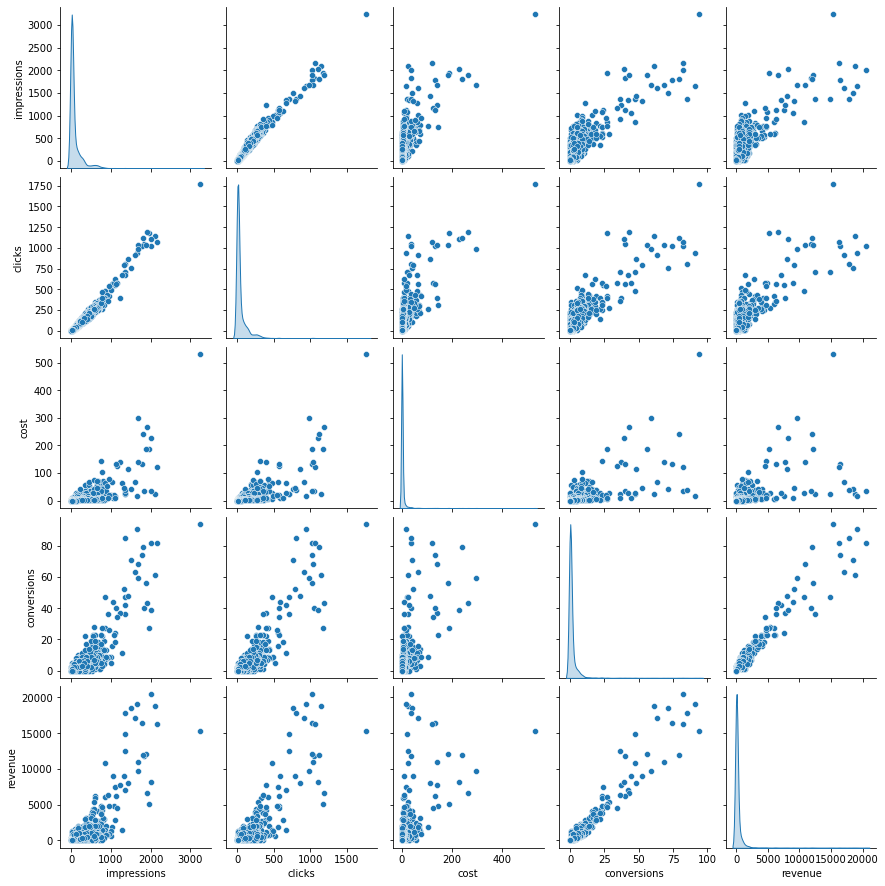

In [39]:
sns.pairplot(data=df, diag_kind='kde')

In [40]:
#df['conversions']=df['conversions'].astype('float')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         4571 non-null   object 
 1   campaign     4571 non-null   object 
 2   adgroup      4571 non-null   object 
 3   ad           4571 non-null   object 
 4   impressions  4571 non-null   int64  
 5   clicks       4571 non-null   int64  
 6   cost         4571 non-null   float64
 7   conversions  4571 non-null   int64  
 8   revenue      4571 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 321.5+ KB


In [42]:
# extracting the date 
df['date']=pd.to_datetime(df['date'])

In [43]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day

In [44]:
#df.drop(df[df['revenue']==0].index, inplace=True)

In [45]:
#df['cost']=(df['cost']*100).astype(int)

In [46]:
df['CTR']=df['clicks']/df['impressions']
df['CPC']=df['cost']/np.float64(df['clicks'])
df['CPA']=df['cost']/df['conversions']
#df['ROI']=df['revenue']/df['cost']

In [47]:
df['adgroup'] = le.fit_transform(df['adgroup'])
df['ad'] = le.fit_transform(df['ad'])
#df['campaign']=le.fit_transform(df['campaign'])

In [48]:
df.drop('date',axis=1,inplace=True)
df.drop('campaign',axis=1,inplace=True)
df.drop('adgroup',axis=1,inplace=True)
df.drop('ad',axis=1,inplace=True)
df.drop('impressions',axis=1,inplace=True)
df.drop('clicks',axis=1,inplace=True)
#df.drop('cost',axis=1,inplace=True)
#df.drop('conversions',axis=1,inplace=True)

In [49]:
df_final=df.copy()
df_final

,cost,conversions,revenue,year,month,day,CTR,CPC,CPA
0,0.08,0,0.00,2020,1,8,0.250000,0.013333,inf
1,0.00,0,0.00,2020,1,8,0.000000,NaN,NaN
2,0.04,0,0.00,2020,1,8,0.307692,0.010000,inf
3,0.08,0,0.00,2020,1,8,0.800000,0.020000,inf
4,1.29,4,925.71,2020,1,8,0.510121,0.010238,0.3225
...,...,...,...,...,...,...,...,...,...
4566,0.07,0,0.00,2021,2,28,0.315789,0.011667,inf
4567,0.00,0,0.00,2021,2,28,0.000000,NaN,NaN
4568,0.12,1,93.20,2021,2,28,0.500000,0.015000,0.1200
4569,0.23,0,0.00,2021,2,28,0.351351,0.017692,inf


In [50]:
df_final.head(8)

,cost,conversions,revenue,year,month,day,CTR,CPC,CPA
0,0.08,0,0.00,2020,1,8,0.250000,0.013333,inf
1,0.00,0,0.00,2020,1,8,0.000000,NaN,NaN
2,0.04,0,0.00,2020,1,8,0.307692,0.010000,inf
3,0.08,0,0.00,2020,1,8,0.800000,0.020000,inf
4,1.29,4,925.71,2020,1,8,0.510121,0.010238,0.3225
5,0.04,0,0.00,2020,1,8,0.285714,0.020000,inf
6,0.05,0,0.00,2020,1,8,0.500000,0.016667,inf
7,0.58,0,0.00,2020,1,8,0.403101,0.011154,inf


In [51]:
#X=df_final.drop(['revenue'],axis=1).values.astype(np.float)
#Y=df_final['revenue'].values.astype(np.float)

In [52]:
#df_final['CPA'].isin([np.inf,-np.inf])
#df_final['CPA']=df_final['CPA'].replace(np.inf,np.nan)
df_final['CTR']=df_final['CTR'].replace(np.inf,0)
df_final['CTR']=df_final['CTR'].fillna(method='ffill')

df_final['CPC']=df_final['CPC'].replace(np.inf,0)
df_final['CPC']=df_final['CPC'].fillna(method='ffill')
#new_test_data['CPC']=new_test_data['CPC'].replace(np.nan,new_test_data['CPC'].mode())

df_final['CPA']=df_final['CPA'].replace(np.inf,0)
#new_test_data['CPA']=new_test_data['CPA'].replace(np.nan,new_test_data['CPA'].mode())
df_final['CPA']=df_final['CPA'].fillna(method='ffill')

#df_final['ROI']=df_final['ROI'].replace(np.inf,0)
#new_test_data['ROI']=new_test_data['ROI'].replace(np.nan,new_test_data['CPC'])
#df_final['ROI']=df_final['ROI'].fillna(method='ffill')


#count = np.isinf(df_final).values.sum()
#df_final['CPA'].isnull().sum()
#df_final['CPA']=df_final['CPA'].fillna(0)
#df_final['CPC']=df_final['CPC'].fillna((df_final['CPC'].mean()))
#count = np.isinf(df_final['CPC']).values.sum()
#df_final['CPC']=df_final['CPC'].astype('float64')
#df_final['CPA'].mean()
#df_final['ROI']=df_final['ROI'].fillna((0))
#df_final['CTR']=df_final['CTR'].fillna((df_final['CTR'].mean()))
#df_final['CPC']=round(df_final['CPC'],2)

In [53]:
df_final

,cost,conversions,revenue,year,month,day,CTR,CPC,CPA
0,0.08,0,0.00,2020,1,8,0.250000,0.013333,0.0000
1,0.00,0,0.00,2020,1,8,0.000000,0.013333,0.0000
2,0.04,0,0.00,2020,1,8,0.307692,0.010000,0.0000
3,0.08,0,0.00,2020,1,8,0.800000,0.020000,0.0000
4,1.29,4,925.71,2020,1,8,0.510121,0.010238,0.3225
...,...,...,...,...,...,...,...,...,...
4566,0.07,0,0.00,2021,2,28,0.315789,0.011667,0.0000
4567,0.00,0,0.00,2021,2,28,0.000000,0.011667,0.0000
4568,0.12,1,93.20,2021,2,28,0.500000,0.015000,0.1200
4569,0.23,0,0.00,2021,2,28,0.351351,0.017692,0.0000


In [54]:
#df_final['ROI']=df_final['ROI'].astype('float64')
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cost         4571 non-null   float64
 1   conversions  4571 non-null   int64  
 2   revenue      4571 non-null   float64
 3   year         4571 non-null   int64  
 4   month        4571 non-null   int64  
 5   day          4571 non-null   int64  
 6   CTR          4571 non-null   float64
 7   CPC          4571 non-null   float64
 8   CPA          4571 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 321.5 KB


In [55]:
#lr=SVR(kernel='linear',C=10)
#kernel='linear'
#from sklearn.linear_model import LinearRegression
#lr=LinearRegression(fit_intercept=False,n_jobs=1000)

X=df_final.drop(['revenue'],axis=1).values.astype(np.float)
Y=df_final['revenue'].values.astype(np.float)


#lr=SVR(kernel='linear',C=0.1,gamma='scale',epsilon=0.001,tol=1000)

#lr=SVR(C=10,gamma=0.1)



lr=DecisionTreeRegressor(criterion='mae',max_depth=7,splitter='best',ccp_alpha=0.0)



#lr=XGBRegressor(n_estimators=1000,max_depth=7)
#from sklearn.ensemble import AdaBoostRegressor
#lr = AdaBoostRegressor(random_state=0, n_estimators=100)
lr.fit(X,Y)

DecisionTreeRegressor(criterion='mae', max_depth=7)

In [56]:
new_test_data.head(8)

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions
0,01-03-2021,campaign 1,adgroup 1,ad 1,0.58,121,49,1
1,01-03-2021,campaign 1,adgroup 3,ad 1,0.17,22,12,0
2,01-03-2021,campaign 1,adgroup 4,ad 1,0.05,5,3,0
3,01-03-2021,campaign 1,adgroup 2,ad 1,0.01,2,1,0
4,01-03-2021,campaign 1,adgroup 2,ad 2,0.01,3,1,0
5,01-03-2021,campaign 1,adgroup 4,ad 2,0.03,4,2,0
6,01-03-2021,campaign 1,adgroup 1,ad 2,1.67,276,123,1
7,01-03-2021,campaign 1,adgroup 2,ad 3,0.00,6,0,0


In [57]:
new_test_data['date']=pd.to_datetime(new_test_data['date'])

In [58]:
new_test_data['year']=new_test_data['date'].dt.year
new_test_data['month']=new_test_data['date'].dt.month
new_test_data['day']=new_test_data['date'].dt.day
#new_test_data['ROI']=new_test_data['revenue']/new_test_data['cost']

In [59]:
new_test_data['CTR']=new_test_data['clicks']/new_test_data['impressions']
new_test_data['CPC']=new_test_data['cost']/new_test_data['clicks']
new_test_data['CPA']=new_test_data['cost']/new_test_data['conversions']

In [60]:
new_test_data['CTR']=new_test_data['CTR'].replace(np.inf,0)
new_test_data['CTR']=new_test_data['CTR'].fillna(method='ffill')

new_test_data['CPC']=new_test_data['CPC'].replace(np.inf,0)
new_test_data['CPC']=new_test_data['CPC'].fillna(method='ffill')
#new_test_data['CPC']=new_test_data['CPC'].replace(np.nan,new_test_data['CPC'].mode())

new_test_data['CPA']=new_test_data['CPA'].replace(np.inf,0)
#new_test_data['CPA']=new_test_data['CPA'].replace(np.nan,new_test_data['CPA'].mode())
new_test_data['CPA']=new_test_data['CPA'].fillna(method='ffill')

#new_test_data['ROI']=new_test_data['ROI'].replace(np.inf,0)
#new_test_data['ROI']=new_test_data['ROI'].replace(np.nan,new_test_data['CPC'])
#new_test_data['ROI']=new_test_data['ROI'].fillna(method='ffill')

In [61]:
new_test_data.drop('date',axis=1,inplace=True)
new_test_data.drop('campaign',axis=1,inplace=True)

new_test_data['adgroup']=le1.fit_transform(new_test_data['adgroup'])
new_test_data['ad'] = le1.fit_transform(new_test_data['ad'])
#new_test_data['campaign']=le.fit_transform(new_test_data['campaign'])

new_test_data.drop('impressions',axis=1,inplace=True)

#new_test_data.drop('conversions',axis=1,inplace=True)


new_test_data.drop('adgroup',axis=1,inplace=True)
new_test_data.drop('ad',axis=1,inplace=True)

In [62]:
#new_test_data['CPC']=new_test_data['CPC'].fillna(float(new_test_data['CPC'].mean()))
#new_test_data['CTR']=new_test_data['CTR'].fillna(float(new_test_data['CTR'].mean()))


In [63]:
a=new_test_data[(new_test_data['conversions']==0) | (new_test_data['cost']==0) | (new_test_data['clicks']<1)]
b=a.index.tolist() 
b

[1,
 2,
 3,
 4,
 5,
 7,
 9,
 11,
 12,
 14,
 16,
 18,
 20,
 21,
 22,
 24,
 25,
 28,
 29,
 31,
 35,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 56,
 57,
 58,
 60,
 62,
 64,
 65,
 68,
 69,
 71,
 72,
 73,
 77,
 78,
 79,
 82,
 84,
 85,
 88,
 92,
 95,
 96,
 97,
 98,
 99,
 101,
 102,
 104,
 106,
 108,
 110,
 112,
 114,
 116,
 120,
 121,
 123,
 124,
 125,
 127,
 130,
 131,
 132,
 133,
 135,
 136,
 137,
 139,
 141,
 142,
 143,
 145,
 146,
 149,
 150,
 151,
 153,
 155,
 157,
 158,
 159,
 161,
 162,
 163,
 165,
 167,
 168,
 169,
 170,
 171,
 172,
 174,
 175,
 176,
 177,
 180,
 181,
 182,
 184,
 185,
 187,
 189,
 190,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 201,
 203,
 204,
 205,
 207,
 208,
 210,
 211,
 212,
 215,
 216,
 217,
 218,
 220,
 221,
 222,
 223,
 224,
 226,
 227,
 229,
 231,
 232,
 233,
 234,
 235,
 236,
 238,
 239,
 240,
 241,
 242,
 243,
 244,
 246,
 247,
 248,
 249,
 252,
 254,
 256,
 257,
 260,
 262,
 263,
 264,
 265,
 266,
 267,
 268,
 269,
 

In [64]:
new_test_data.drop('clicks',axis=1,inplace=True)
#new_test_data.drop('cost',axis=1,inplace=True)
target=lr.predict(new_test_data)
j=0
for i in range(0,317):
    if(i==b[j]):
        j=j+1
        target[i]=0  
    elif (target[i]<0):
        target[i]=abs(target[i])

In [65]:
res=pd.DataFrame(target) 
res.columns = ["revenue"]
res.to_csv("prediction_results.csv", index = False)